In [ ]:
%pip install pyvis
%pip install nxviz
%pip install pandas


In [8]:
import pandas as pd
from nxviz import CircosPlot
from pyvis.network import Network
from IPython.core.display import display, HTML
import matplotlib.pyplot as plt
import numpy as np
import networkx as nx

/var/folders/g9/nxpm3gzj3l77tx8_j2wv_9700000gn/T/ipykernel_56828/2851935729.py:4: DeprecationWarning: Importing display from IPython.core.display is deprecated since IPython 7.14, please import from IPython display
  from IPython.core.display import display, HTML


In [12]:
df = pd.read_csv('../dataset/NetflixOriginals.csv', encoding='latin1')

In [ ]:
action_genre = 'Action'

# filtra apenas para o gênero de ação
df_filtered = df[df['Genre'].str.contains(action_genre)]

all_genres = set()
for genres in df_filtered['Genre']:
    split_genres = genres.split('/')
    for genre in split_genres:
        all_genres.add(genre)

all_genres = sorted(all_genres)

# cria a matriz de adjacência
adjacency_matrix = np.zeros((len(df_filtered), len(all_genres)), dtype=int)

for i, genres in enumerate(df_filtered['Genre']):
    split_genres = genres.split('/')
    for genre in split_genres:
        j = all_genres.index(genre)
        adjacency_matrix[i, j] = 1

adjacency_df = pd.DataFrame(adjacency_matrix, columns=all_genres)

plt.imshow(adjacency_df.values, cmap='YlGnBu')

# configura os rótulos dos eixos x e y
plt.xticks(ticks=range(len(all_genres)), labels=all_genres, rotation=45)
plt.yticks(ticks=range(len(df_filtered)), labels=df_filtered['Title'])

plt.colorbar()
plt.show()

In [19]:
# criar um grafo "normal"
G = nx.Graph()

G.add_nodes_from(df['Title'], ntype='movie')

# add arestas ao grafo com base na coluna genero
for index, row in df.iterrows():
    title = row['Title']
    genres = row['Genre'].split('/')
    for genre in genres:
        G.add_edge(title, genre)

In [20]:
if nx.is_connected(G):
    diameter = nx.diameter(G)
    print("Diâmetro:", diameter)
else:
    print("Error. Não é possível achar o diâmetro")

A rede não é totalmente conectada. Não é possível o cálculo do diâmetro


In [21]:
if nx.is_connected(G):
    peripheral_nodes = nx.periphery(G)
    print("Nós periféricos da rede:", peripheral_nodes)
else:
    print("Error. Não é possível achar a periferia da rede")

A rede não é totalmente conectada. Não achar a periferia


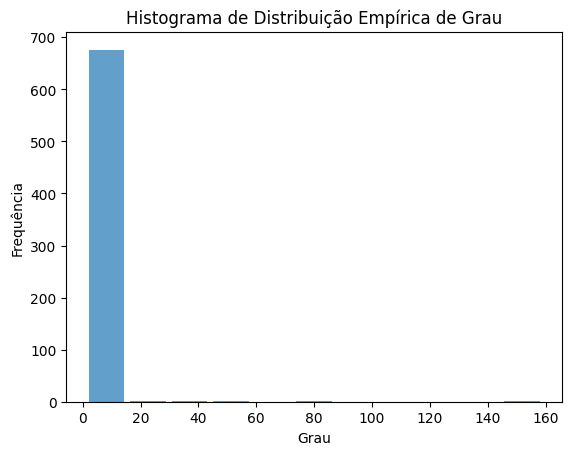

In [23]:
degree_sequence = [d for n, d in G.degree()]

plt.hist(degree_sequence, bins='auto', alpha=0.7, rwidth=0.85)

plt.xlabel('Grau')
plt.ylabel('Frequência')
plt.title('Histograma de Distribuição Empírica de Grau')

plt.show()

In [26]:
nodes_of_interest = ['Mercy', 'Dark Forces', 'Rebirth']

clustering_coefficients = nx.clustering(G, nodes_of_interest)

for node, coefficient in clustering_coefficients.items():
    print(f"Coeficiente de Clustering Local para o nó {node}: {coefficient}")

Coeficiente de Clustering Local para o nó Mercy: 0
Coeficiente de Clustering Local para o nó Dark Forces: 0
Coeficiente de Clustering Local para o nó Rebirth: 0


In [27]:
clustering_coefficient_global = nx.average_clustering(G)

print("Coeficiente de Clustering Global: ", clustering_coefficient_global)

Coeficiente de Clustering Global:  0.0


In [38]:
# filtra filmes do gênero "Thriller"
thriller_movies = df[df['Genre'].str.contains('Thriller')]

# cria um grafo direcionado
D = nx.DiGraph()

D.add_nodes_from(thriller_movies['Title'], ntype='movie')

for index, row in thriller_movies.iterrows():
    title = row['Title']
    genres = row['Genre'].split('/')
    for genre in genres:
        G.add_edge(title, genre)

In [ ]:
strongly_connected_components = list(nx.strongly_connected_components(D))

print("Componentes Conectados Fortemente (Gênero Thriller):")
for component in strongly_connected_components:
    print(component)

In [ ]:
weakly_connected_components = list(nx.weakly_connected_components(D))

print("Componentes Conectados Fracamente (Gênero: Thriller):")
for component in weakly_connected_components:
    print(component)

In [ ]:
eigenvector_centrality = nx.eigenvector_centrality(D)

print("Eigenvector centrality:")
for node, centrality in eigenvector_centrality.items():
    print(f"{node}: {centrality}")

In [ ]:
degree_centrality = nx.degree_centrality(G)

print("Degree centrality:")
for node, centrality in degree_centrality.items():
    print(f"{node} = {centrality}")

In [ ]:
closeness_centrality = nx.closeness_centrality(G)

print("Closeness centrality:")
for node, centrality in closeness_centrality.items():
    print(f" {node} = {centrality}")

In [ ]:
betweenness_centrality = nx.betweenness_centrality(G)

print("Betweenness centrality:")
for node, centrality in betweenness_centrality.items():
    print(f"{node} = {centrality}")

In [46]:
assortativity = nx.degree_assortativity_coefficient(G)

print(f"Overall Assortativity = {assortativity}")

Overall Assortativity = -0.3337855882703579


/opt/homebrew/lib/python3.11/site-packages/nxviz/api.py:275: UserWarning: As of nxviz 0.7, the object-oriented API is being deprecated in favour of a functional API. Please consider switching your plotting code! The object-oriented API wrappers remains in place to help you transition over. A few changes between the old and new API exist; please consult the nxviz documentation for more information. When the 1.0 release of nxviz happens, the object-oriented API will be dropped entirely.
  warnings.warn(


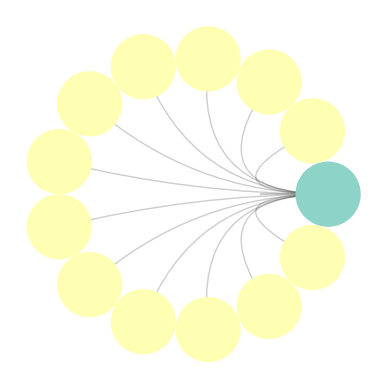

In [74]:
for n, d in G.nodes(data=True):
    G.nodes[n]['degree'] = G.degree(n)

c = CircosPlot(G, node_order='degree', node_color='ntype', node_grouping='ntype')

plt.show()

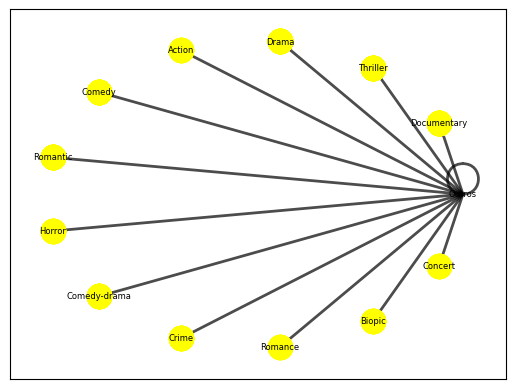

In [85]:
# layout
pos = nx.circular_layout(G)

genres = df['Genre'].tolist()

# olha se os nós de gnero estão presentes no grafo
genres = [genre for genre in genres if genre in G.nodes]

nx.draw_networkx_nodes(G, pos, nodelist=genres, node_color='yellow', label=None)

nx.draw_networkx_edges(G, pos, width=2, alpha=0.7)

# add rótulos aos nós
labels = {node: node.split(' ')[0] for node in G.nodes()}
nx.draw_networkx_labels(G, pos, labels=labels, font_size=6)

plt.show()

In [95]:

# cria uma instância da classe network
nt = Network('1000px', '1000px', notebook=True, bgcolor="#222222", font_color="white")

for node in df['Title']:
    nt.add_node(node, label=node)

nt.show('network.html')
display(HTML('network.html')) # exibir no network [interação só da pelo navegador]

network.html
